## Name: Parthav Joshi
## Roll No: C045

### Aim: Implement the decision tree algorithm for classification

In [34]:
import numpy as np
import pandas as pd

In [35]:
data = pd.read_csv('heart_fail_data.csv')

In [36]:
train = pd.read_csv('heart_fail_data.csv')
display(train.head(3))
print(train.shape)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


(306, 13)


In [37]:
X = train.iloc[:, :-1] # input feature
y = train.iloc[:,-1] # output features
display(X)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
301,65.0,0,94,1,50,1,188000.00,1.0,140,1,0,29
302,69.0,0,582,1,35,0,228000.00,3.5,134,1,0,30
303,90.0,1,60,1,50,0,226000.00,1.0,134,1,0,30
304,82.0,1,855,1,50,1,321000.00,1.0,145,0,0,30


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [39]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, y_train)
preds = model.predict(X_test)
score=model.score(X_test, y_test)
print(score)

0.7419354838709677


In [41]:
features = data.columns
features

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

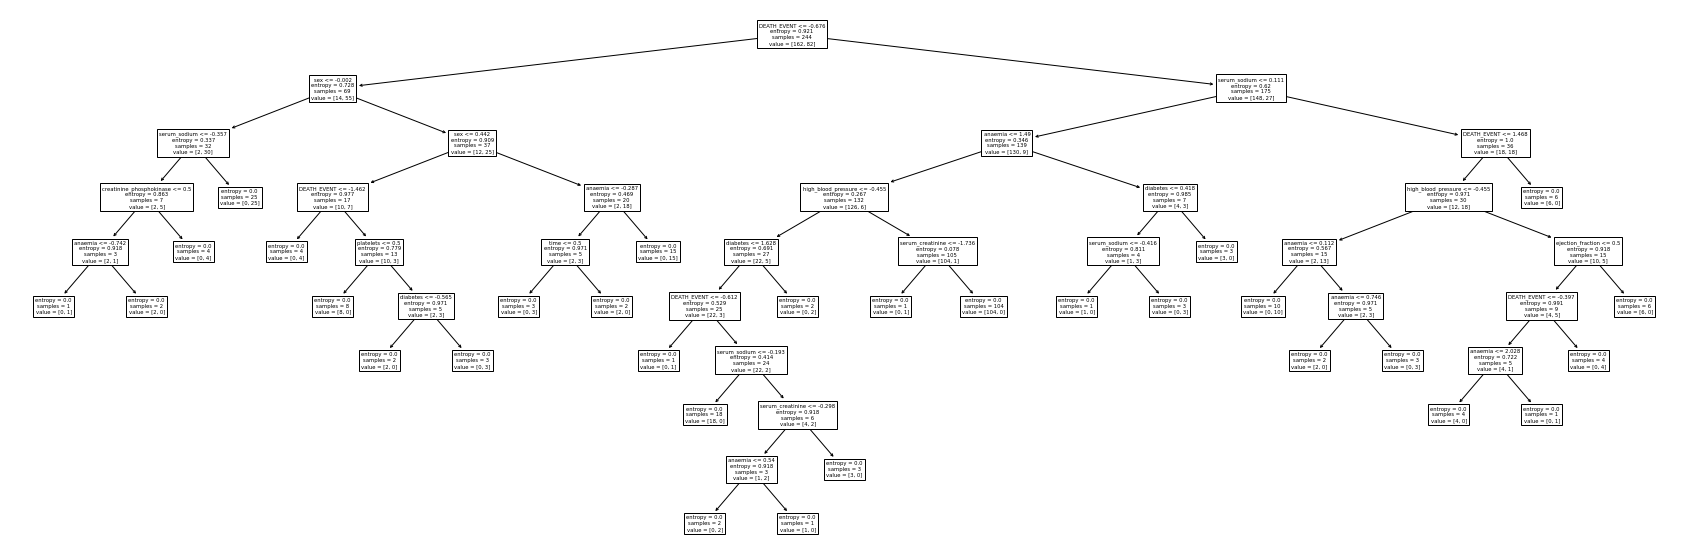

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plot_tree(model, feature_names = features)
plt.show()

In [45]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from six import StringIO
import pydot

features = list(X_train)
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=False)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

FileNotFoundError: [Errno 2] "dot" not found in path.

In [ ]:
graph[0].create_png()